In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


TIME = 'time'
LOAD = 'load'

SEPARATOR = '------------------------------------------------------------------------------------------------'

In [20]:
# Read into dataframe
df = pd.read_csv('ireland-merged.csv',  parse_dates=[TIME])
df = df.set_index(df[TIME]).drop(columns=TIME)
df.head()

,load,rain,temp,year,month,day,day_of_week,day_of_year,weekend,month_sin,month_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos
time,,,,,,,,,,,,,,,,,
2015-01-01,2803,0.4,10.7,2015,1,1,3,1,0,0.5,0.866,0.201,0.980,0.434,-0.901,0.017,1.000
2015-01-02,3029,0.0,6.1,2015,1,2,4,2,0,0.5,0.866,0.394,0.919,-0.434,-0.901,0.034,0.999
2015-01-03,2980,0.4,4.6,2015,1,3,5,3,1,0.5,0.866,0.571,0.821,-0.975,-0.223,0.051,0.999
2015-01-04,2917,0.0,5.5,2015,1,4,6,4,1,0.5,0.866,0.725,0.689,-0.782,0.623,0.069,0.998
2015-01-05,3328,0.1,9.5,2015,1,5,0,5,0,0.5,0.866,0.849,0.529,0.000,1.000,0.086,0.996


In [21]:
# Split the data set

# Train with 2015-2018.
df_train = df['2015-01-01':'2018-12-31']

# Test with 2019.
df_test  = df['2019-01-01':'2019-12-31']

# print("Train head\n", df_train.head())
# print("Train tail\n", df_train.tail())

# print("Test head\n", df_test.head())
# print("Train tail\n", df_test.tail())

In [25]:
def predict(x_train, y_train, x_test, regressor):
    '''Train a model. Return train and test predictions.'''
    regr = DecisionTreeRegressor(max_depth=11)
    lm = regr.fit(x_train, y_train)
    
    #regr_1 = DecisionTreeRegressor(max_depth=2)
    #regr_2 = DecisionTreeRegressor(max_depth=5)
    #regr_1.fit(X, y)
    #regr_2.fit(X, y)
    
    y_train_predict = lm.predict(x_train)
    y_test_predict = lm.predict(x_test)
    
    return y_train_predict, y_test_predict

def mse(title, y_true, y_pred):
    '''Print the MSE.'''
    print(title, mean_squared_error(y_true, y_pred))

def score(features, y_train_true, y_train_predict, y_test_true, y_test_predict, regressor):
    '''Print the training and test scores.'''
    print("Features:  ", features)
    mse("Train MSE: ", y_train_true, y_train_predict)
    mse("Test MSE:  ", y_test_true, y_test_predict)
    print()

def evaluate(df_train, df_test, features, regressor):
    '''Train and score a regression model.'''
    
    x_train = df_train[features]
    x_test = df_test[features]
    
    y_train = df_train[LOAD]
    y_test = df_test[LOAD]
    
    y_train_predict, y_test_predict = predict(x_train, y_train, x_test, regressor)
    score(features, y_train, y_train_predict, y_test, y_test_predict, regressor)

def evaluate_features(df_train, df_test, features, regressor):
    '''Train and score a regression model for each of the given features list.'''
    
    # Print the algorithm used.
    print(regressor if (type(regressor) is str) else type(regressor))
    print()
    
    for f in features:
        evaluate(df_train, df_test, f, regressor)
        
    print(SEPARATOR)

In [33]:
# Build linear regression model with different features and compare their MSE.

# Baseline. Always predict with mean load.
y_train_mean = [df_train[LOAD].mean()]*len(df_train)
y_test_mean = [df_test[LOAD].mean()]*len(df_test)
score(['avg'], df_train[LOAD], y_train_mean, df_test[LOAD], y_test_mean, "Always predict average")
print(SEPARATOR)

STARTING_FEATURES = ['rain','temp']
F1 = STARTING_FEATURES + ['year', 'month', 'day']
F2 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week']
F3 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend']
F4 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend'] + ['month_sin', 'month_cos']
F5 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend'] + ['month_sin', 'month_cos'] + ['day_of_week_sin', 'day_of_week_cos']
F6 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend'] + ['month_sin', 'month_cos'] + ['day_of_week_sin', 'day_of_week_cos'] + ['day_sin', 'day_cos']
F7 = STARTING_FEATURES + ['year', 'month', 'day', 'day_of_week', 'weekend'] + ['month_sin', 'month_cos'] + ['day_of_week_sin', 'day_of_week_cos'] + ['day_sin', 'day_cos'] + ['day_of_year_sin', 'day_of_year_cos']

features = [STARTING_FEATURES,
            F1,
            F2,
            F3,
            F4,
            F5,
            F6,
            F7]

evaluate_features(df_train, df_test, features, DecisionTreeRegressor(max_depth=1))
#evaluate_features(df_train, df_test, features, RandomForestRegressor(n_estimators = 1000, random_state = 42))


Features:   ['avg']
Train MSE:  90319.90645301684
Test MSE:   82969.37684368549

------------------------------------------------------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>

Features:   ['rain', 'temp']
Train MSE:  35534.16915656319
Test MSE:   96947.02682256789

Features:   ['rain', 'temp', 'year', 'month', 'day']
Train MSE:  8651.690031628224
Test MSE:   62174.45102212253

Features:   ['rain', 'temp', 'year', 'month', 'day', 'day_of_week']
Train MSE:  1249.0695997860566
Test MSE:   23208.538987035645

Features:   ['rain', 'temp', 'year', 'month', 'day', 'day_of_week', 'weekend']
Train MSE:  1249.0695997860566
Test MSE:   23335.90618642682

Features:   ['rain', 'temp', 'year', 'month', 'day', 'day_of_week', 'weekend', 'month_sin', 'month_cos']
Train MSE:  1055.9051588290724
Test MSE:   18812.97231741372

Features:   ['rain', 'temp', 'year', 'month', 'day', 'day_of_week', 'weekend', 'month_sin', 'month_cos', 'day_of_week_sin', 

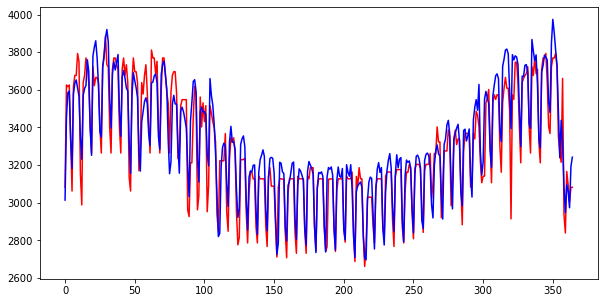

In [36]:
#Train MSE:  862.678251863792
#Test MSE:   6832.13462250137

#decision tree regressor depth 2
#Train MSE:  33250.04349755026
#Test MSE:   55246.40156039068
  
#3
#Train MSE:  654.7638630105383
#Test MSE:   10892.678154490108
    
#4
#Train MSE:  654.7638630105383
#Test MSE:   11381.646647640793
    
#decision tree regressor depth 5
#Train MSE:  12278.434965546503
#Test MSE:   12418.611533793424

#6
#Train MSE:  654.7638630105383
#Test MSE:   10867.508462709286

#7
#Train MSE:  654.7638630105383
#est MSE:   10992.98894216134

#8
#Train MSE:  654.7638630105383
#Test MSE:   11736.989627092848
    
#9
#Train MSE:  654.7638630105383
#Test MSE:   10770.297503805175


#decision tree regressor depth 10
#Train MSE:  1128.7257257236834
#Test MSE:   11283.64966768878
   
       
#11
#Train MSE:  654.7638630105383
#Test MSE:   10466.052127092848 
    
#decision tree regressor depth 12   
#Train MSE:  355.8878716659715
#Test MSE:   11534.389355786752  

#14
#Train MSE:  85.26541484316124
#Test MSE:   11300.40886176837

    

# Visualize test set prediction vs actual values.

features = F7

x_train = df_train[features]
x_test = df_test[features]

y_train = df_train[LOAD]
y_test = df_test[LOAD]

# print(y_test.to_numpy())
# print(y_test_predict)

y_train_predict, y_test_predict = predict(x_train, y_train, x_test, DecisionTreeRegressor(max_depth=9))

# Red - prediction
# Blue - actual
plt.plot(y_test_predict,'r', y_test.to_numpy() ,'b' )
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()